eig_vals [125.  25.]
固有ベクトル1: [ 0.8660254 -0.5      ]
固有ベクトル1: [0.5       0.8660254]


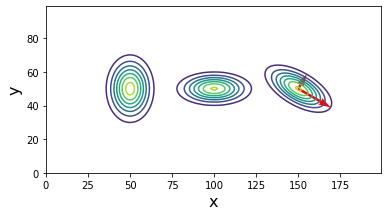

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.arange(0,200,1),np.arange(0,100,1))
pos = np.empty(x.shape+(2,))
pos[:,:,0]=x
pos[:,:,1]=y

a = multivariate_normal(mean=[50,50],cov=[[50,0],[0,100]])
b = multivariate_normal(mean=[100,50],cov=[[125,0],[0,25]])
c = multivariate_normal(mean=[150,50],cov=[[100,-25*math.sqrt(3)],[-25*math.sqrt(3),50]])

eig_vals, eig_vec = np.linalg.eig(c.cov)
print("eig_vals", eig_vals)
print("固有ベクトル1:",eig_vec[:,0])
print("固有ベクトル1:",eig_vec[:,1])

fig = plt.figure()
ax = fig.add_subplot()

for e in [a,b,c]:
    ax.contour(x,y,e.pdf(pos))
    
ax.set_aspect("equal")
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)

v1 = 2*math.sqrt(eig_vals[0])*eig_vec[:,0]
v2 = 2*math.sqrt(eig_vals[1])*eig_vec[:,1]
ax.quiver(c.mean[0],c.mean[1],v1[0],v1[1],color="red",angles="xy",scale_units="xy",scale=1)
ax.quiver(c.mean[0],c.mean[1],v2[0],v2[1],color="red",angles="xy",scale_units="xy",scale=1)
plt.show()